# 7.4 Decision Tree and Random Forest with Scikit-Learn

In [3]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Glucose,BMI,Outcome
0,141,33.02,0
1,83,30.20,0
2,128,27.16,0
3,112,35.16,1
4,71,27.22,0


In [5]:
df.isnull().sum()

Glucose    0
BMI        0
Outcome    0
dtype: int64

In [6]:
X = df.iloc[:,:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

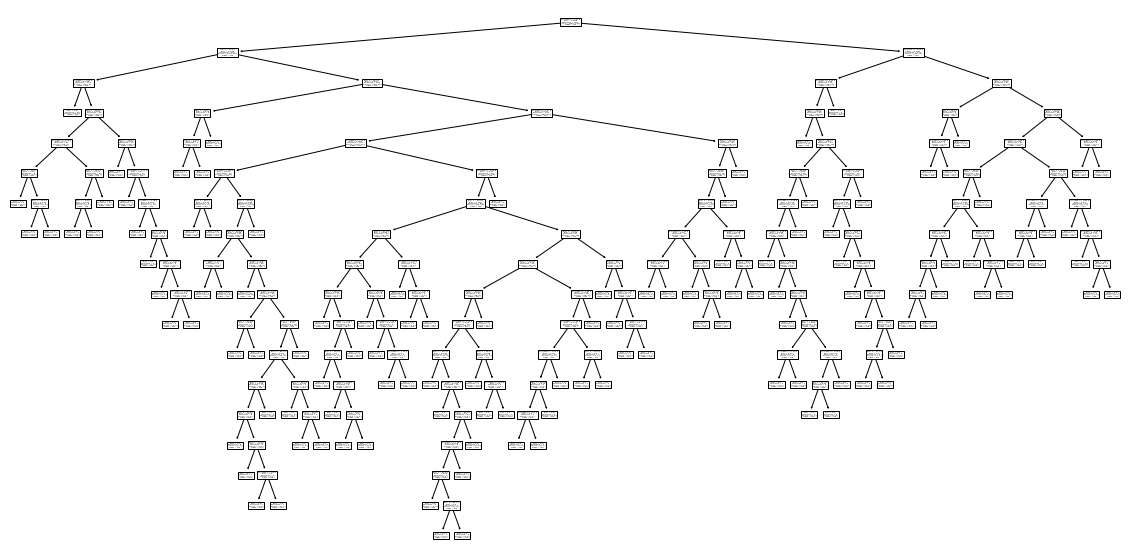

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Glucose', 'BMI'], class_names=['No', 'Yes'])
plt.show()

In [9]:
clf.set_params(max_depth = 3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

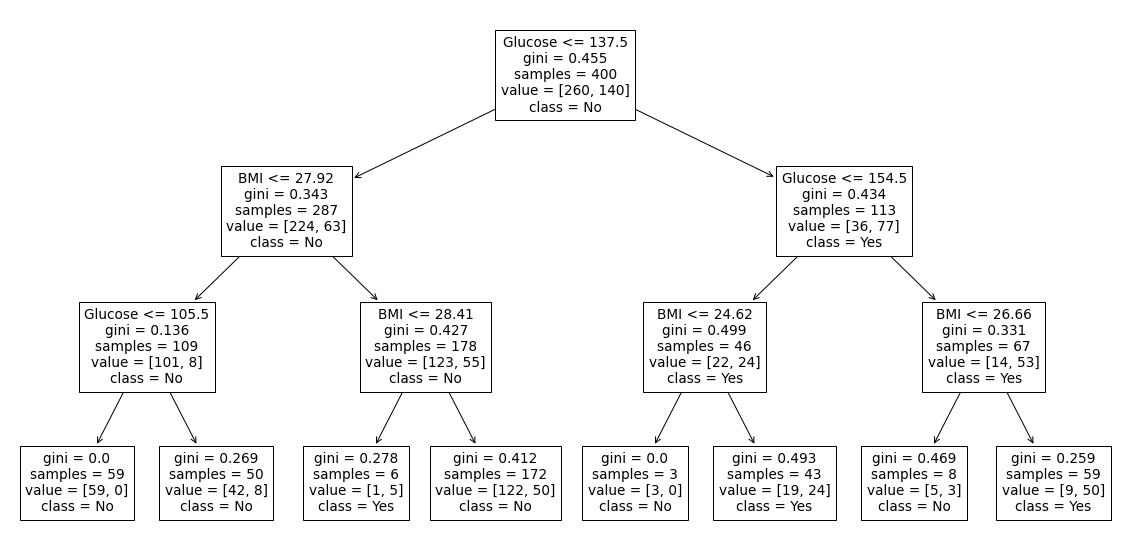

In [10]:
clf.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Glucose', 'BMI'], class_names=['No', 'Yes'])
plt.show()

In [11]:
clf.predict([[90, 20], [200, 30]])

array([0, 1])

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
accuracy = scores.mean()
accuracy

0.7125

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf_rf= RandomForestClassifier(n_estimators = 200, max_depth=3, random_state=0)

In [14]:
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=5, scoring="accuracy")
accuracy = scores.mean()
accuracy

0.725

# 7.6 SVM with Scikit-Learn

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
scaler = ('scaler', StandardScaler())
clf_svc = ('SVM', SVC(kernel='rbf', random_state=0)) 
pipeline = Pipeline([scaler, clf_svc])

In [16]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVM',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [17]:
pipeline.predict([[90, 20], [200, 30]])

array([0, 1])

In [18]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
accuracy = scores.mean()
accuracy

0.745

In [19]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.74